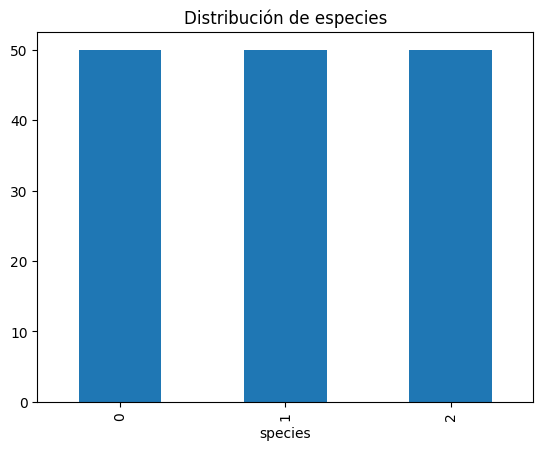

LogisticRegression accuracy: 1.00
DecisionTree accuracy: 1.00
XGBoost accuracy: 1.00
✅ Mejor modelo guardado: LogisticRegression


In [1]:
# Iris Notebook: Exploración y Entrenamiento
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

# Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Visualización básica
df['species'].value_counts().plot(kind='bar', title='Distribución de especies')
plt.show()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento de modelos
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(max_depth=3),
    "XGBoost": XGBClassifier(n_estimators=50)
}
scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    scores[name] = acc
    print(f"{name} accuracy: {acc:.2f}")

# Guardar el mejor modelo
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
with open("../models/trained_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ Mejor modelo guardado: {best_model_name}")


In [2]:
!which python
!pip show pandas


/home/nelson/pipeline-flow-api/prefect-api-env/bin/python
Name: pandas
Version: 2.3.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
         
         Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
         All rights reserved.
         
         Copyright (c) 2011-2023, Open source contributors.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the fol